# Offline Rendering to Image / Video

This notebook shows a images and videos / animations can be rendered.

In [1]:
from quokka import render,Preset
import numpy as np
from matplotlib import pyplot as plt

In [2]:

import nibabel as nib

volume = nib.load("../../data/alignmentMetricVolume_byStress_PSLs.nii").get_fdata()

In [3]:
import json

with open("../../presets/test.json","r") as f:
    preset = Preset.from_dict(json.load(f))

print(preset)

Preset(name='test', render_settings=RenderSettings(spatial_filter='linear', temporal_filter='linear', dvr=DVRSettings(enabled=True, distance_scale=20.0, vmin=None, vmax=0.8), iso_surface=IsoSettings(enabled=True, use_cube_surface_grad=False, shininess=20.0, threshold=0.5, ambient_color=(0.0, 0.0, 0.0), specular_color=(0.7, 0.7, 0.7), light_color=(1.0, 1.0, 1.0), diffuse_color=(0.7633447, 0.07251777, 0.07251777, 1.0)), ssao=SSAOSettings(enabled=True, radius=0.25, bias=0.02, kernel_size=256), background_color=(1.0, 1.0, 1.0, 1.0), near_clip_plane=0.45), cmap={'r': [(0.0, 0.7372549, 0.7372549), (0.003921569, 0.7254902, 0.7254902), (0.007843138, 0.7176471, 0.7176471), (0.011764706, 0.7058824, 0.7058824), (0.015686275, 0.69411767, 0.69411767), (0.019607844, 0.6862745, 0.6862745), (0.023529412, 0.6745098, 0.6745098), (0.02745098, 0.6627451, 0.6627451), (0.03137255, 0.6509804, 0.6509804), (0.03529412, 0.6392157, 0.6392157), (0.039215688, 0.627451, 0.627451), (0.043137256, 0.61960787, 0.619607

## Static Image

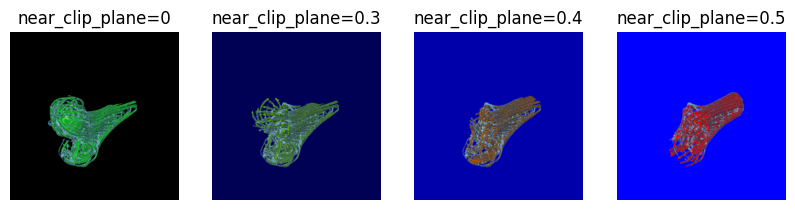

In [4]:
# the diverging_alpha function creates a colormap that is transparent at the ends

fig, ax = plt.subplots(1,4,figsize=(10,5))
for i,c in enumerate((0,0.3,0.4,0.5)):
    preset.render_settings.near_clip_plane = c
    preset.render_settings.background_color = (0,0,i/3,1.)
    preset.render_settings.iso_surface.diffuse_color = (i/3,1-i/3,0,1)
    img = render(
        volume,
        preset,
        width=512,
        height=512,
    )
    ax[i].imshow(img) 
    ax[i].axis("off")
    ax[i].set_title(f"near_clip_plane={c}")

## Video

In [8]:
import math
import matplotlib.animation as animation
from IPython.display import HTML

fps = 24
video_duration = 1
n_frames = fps * video_duration
video = []

preset.render_settings.background_color = (1,1,1,1.)
preset.render_settings.near_clip_plane = None

for i in range(n_frames):
    t = i/n_frames
    preset.camera = (math.cos(2*math.pi*t),0.,math.sin(2*math.pi*t))
    img = render(
        volume,
        preset,
        width=512,
        height=512,
    )
    video.append(img)

frames = [] # for storing the generated images
fig = plt.figure()
plt.axis('off')
for i in range(len(video)):
    frames.append([plt.imshow(video[i],animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=1000/fps, blit=True)
plt.close()
HTML(ani.to_jshtml())